# 07: Vizualizace a manipulace s grafikou

Tento notebook je výukovým materiálem v předmětu BI-JUL.21 vyučovaném v zimním semestru akademického roku 2021/2022 [Tomášem Kalvodou](mailto:tomas.kalvoda@fit.cvut.cz). Tvorba těchto materiálů byla podpořena NVS FIT.

Hlavní stránkou předmětu, kde jsou i další notebooky a zajímavé informace, je jeho [Course Pages](https://courses.fit.cvut.cz/BI-JUL) stránka.

In [86]:
versioninfo()

Julia Version 1.7.3
Commit 742b9abb4d (2022-05-06 12:58 UTC)
Platform Info:
  OS: Linux (x86_64-redhat-linux)
  CPU: Intel(R) Core(TM) i5-8350U CPU @ 1.70GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-12.0.1 (ORCJIT, skylake)


In [87]:
using Pkg
Pkg.add("GR")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


---
## 1. Vizualizace

Nejen v Julia existuje celá řada nástrojů/knihoven pro vytváření různých grafů, diagramů a vizualizací. V Python ekosystému je asi nejpoúžívanější [Matplotlib](https://matplotlib.org), který je k dispozici i v Julia (viz `PyPlot.jl` [níže](#pyplot)).

Všechny tyto nástroje se snaží dosáhnout podobných cílů a nabízejí různě kvalitní implementace.
Dost často bývá otázkou vkusu, který z nástrojů použít.
V tomto notebooku ukážeme tři možnosti:

 * `GR.jl`
 * `PyPlot.jl`
 * `PGFPlotsX.jl`
 * [`Makie`](https://makie.juliaplots.org/stable/)

Paleta možností je ale širší.
Zmiňme alespoň následující (pro zájemce k prozkoumání):

 * [`Plots`](http://docs.juliaplots.org/latest/): nadstavba nad několika grafickými balíčky.
 * [`Gadfly`](https://github.com/GiovineItalia/Gadfly.jl): atraktivní a interaktivní výstup.
 * [`Winston`](https://github.com/JuliaGraphics/Winston.jl): malý a rychlý, terminologií vychází s MATLABu.

Možností je opravdu mnoho a tento notebook je spíše experimentální.

**Při používání tohoto notebooku doporučuji vždy mezi sekcemi (různými balíčky) restartovat jádro. Moduly mají podobné zaměření a mohlo by dojít ke kolizím pojmenování metod.**

---
### 1.1 [`GR.jl`](https://github.com/jheinen/GR.jl)

Balíček `GR.jl` poskytuje Julia rozhranní k [GR frameworku](https://gr-framework.org).
GR byl vyvinut skupinou [Scientific IT-Systems](https://pgi-jcns.fz-juelich.de/) z [Peter Grünberg Institutu](https://www.fz-juelich.de/pgi) na [Forschungszentrum Jülich](https://www.fz-juelich.de/).

  * Mezi jeho **přednosti** patří **rychlost**.
  * Mezi **nevýhody** bych zařadil **nekvalitní dokumentaci** a **nekonzistenci** API. (Chyba může být ale na straně Julia balíčku...)

Tento balíček pravděpodobně nemáte nainstalovaný, takže nejprve tento musíme nainstalovat (případně viz [pokyny k instalaci systémových závislostí](https://gr-framework.org/julia.html#installation)):

```
(@v1.6) pkg> add GR
```

Zde v notebooku projdeme jen ty nejužitečnější části balíčku.
Také tento balíček použijeme jako jakéhosi průvodci po možnostech, u ostatních se totiž dost opakují.
Zvídavého čtenáře odkazujeme na dokumentaci s [ukázkami dalších typů grafů](https://gr-framework.org/julia-jlgr.html#output-functions).

In [88]:
using GR

Tvorbu jednotlivých grafů můžeme oddělit zavoláním `figure`, případně `subplot`. K dispozici také je `savefig`.

----
#### `plot` a `oplot`

Pomocí `plot` nepřekvapivě vykreslíme 2D graf funkce. Poziční argumenty mohou mít následující význam:

 * stejně dlouhé vektory `x` a `y` reprezentující souřadnice bodů,
 * vektor `x` a funkce pro výpočet $y$-nové hodnoty,
 * pouze vektor `y`, nezávisle proměnná pak odpovídá indexům.

Dále `plot` přijímá několik _keyword_ argumentů, nejzajímavější asi jsou:

 * `title`: titulek grafu (alternativně metoda `title`),
 * `xlabel`: titulek grafu (alternativně metoda `xlabel`),
 * `ylabel`: titulek grafu (alternativně metoda `ylabel`),
 * `xlim`, `ylim`: rozsah jednotlivých os (alternativně metody `xlim` a `ylim`),

a metoda

 * `legend`: popisky jednotlivých grafů.

Následuje několik jednoduchých ukázek:

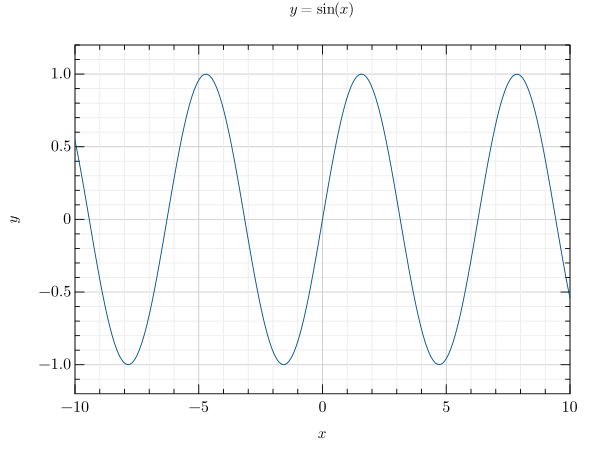

In [89]:
xs = LinRange(-10, 10, 200)
ys = sin.(xs)

figure()
plot(xs, ys, title="\$y=\\sin(x)\$", xlabel="\$x\$", ylabel="\$y\$", ylim=(-1.2, 1.2))

Pokud chceme vykreslit více dat do jednoho obrázku, použijeme k tomu `oplot`, nastavení popisků atp. se bohužel bere z posledního volání `oplus` (lze to obejít nastavením těchto parametrů pomocí metod, ne pomocí _keyword_ hodnot).

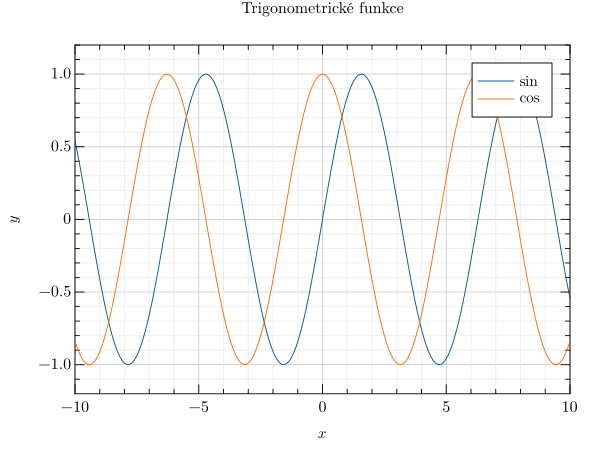

In [90]:
legend("\$\\sin\$", "\$\\cos\$")

oplot(xs, cos, title="Trigonometrické funkce", xlabel="\$x\$", #=
           =#  ylabel="\$y\$", ylim=(-1.2, 1.2))

Styl čáry by mělo jít kontrolovat pomocí klíčů:

 * `setlinetype`: druh čáry (viz `GR.LINETYPE_...`),
 * `setlinewidth`: šířka čáry,
 * `setlinecolorind`: barva čáry (???).

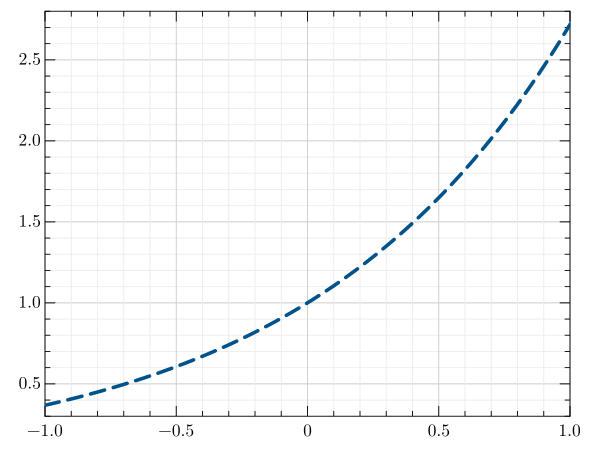

In [91]:
figure()

setlinetype(GR.LINETYPE_DASHED)
setmarkercolorind(11)
plot(LinRange(-1, 1, 50), exp, linewidth=4)

Zde jsem se vzdal a proto:

----
#### Cvičení: ???

1. Pokuste`*` se změnit barvu čáry například na červenou.

`*` tj. úspěch není nutný.

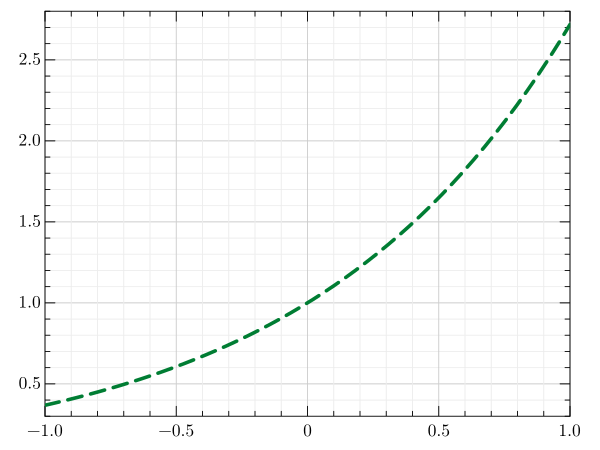

In [92]:
figure()

plot(LinRange(-1, 1, 50), exp, "--g", linewidth=4)

----
#### `scatter`

_Scatter_ plot vykresluje pouze jednotlivé body a neinterpoluje (lineárně) mezi nimi:

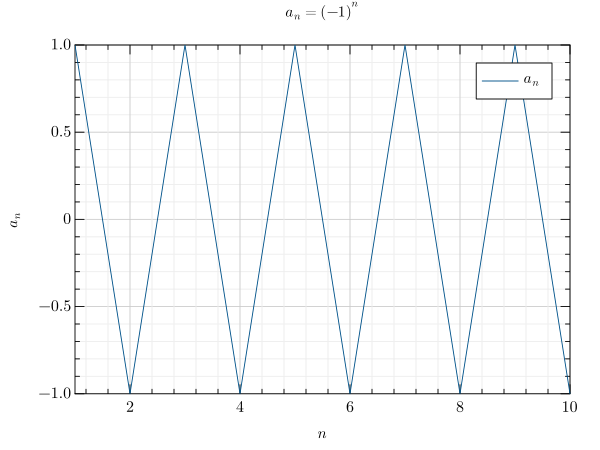

In [93]:
figure()

title("\$a_n = (-1)^n\$")
legend("\$a_n\$")
xlabel("\$n\$")
ylabel("\$a_n\$")

plot([(-1)^n for n=0:9])

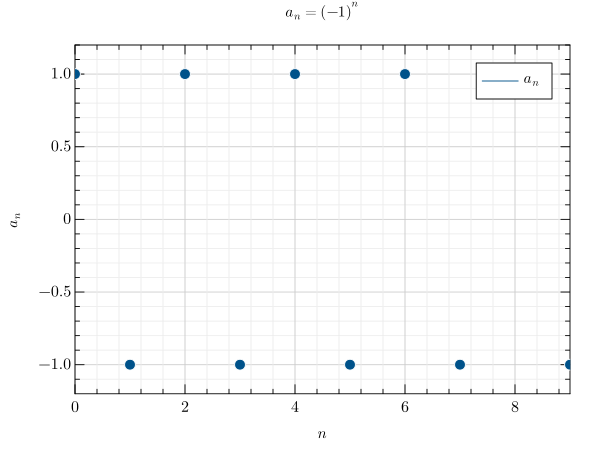

In [94]:
figure()

title("\$a_n = (-1)^n\$")
legend("\$a_n\$")
xlabel("\$n\$")
ylabel("\$a_n\$")

scatter(0:9, [(-1)^n for n=0:9], ylim=(-1.2, 1.2))

----
#### `plot3`

`plot3` je 3D analog čárového grafu. Přijímá tedy tři _vektory_ `x`, `y` a `z`, jejichž složky popořadě tvoří jednotlivé body křivky.

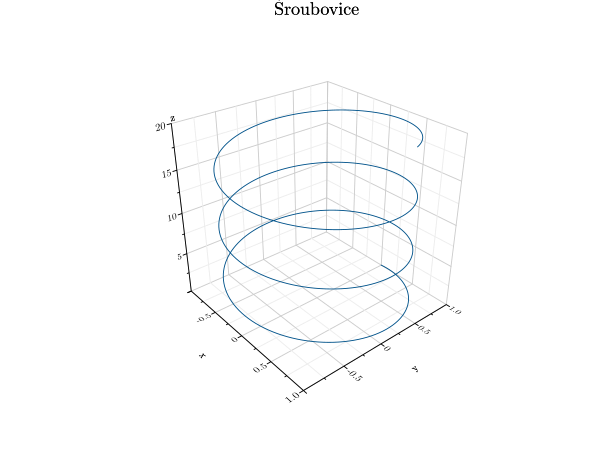

In [95]:
ts = LinRange(0, 20, 400)
xs = [ sin(t) for t in ts ]
ys = [ cos(t) for t in ts ]
zs = ts

figure()
plot3(xs, ys, zs, xlabel="x", ylabel="y", zlabel="z", title="Šroubovice")

----
#### `histogram` a `hexbin`, Cvičení

Histogram bere vektor `x` hodnot a jako _keyword_ argument `nbins` udávající počet přihrádek.
Budeme ho ilustrovat na náhodném generátoru bodů na kružnici (vzpomeňte dřívější diskuzi).

In [96]:
xs = rand(5000) .- 0.5
ys = rand(5000) .- 0.5;

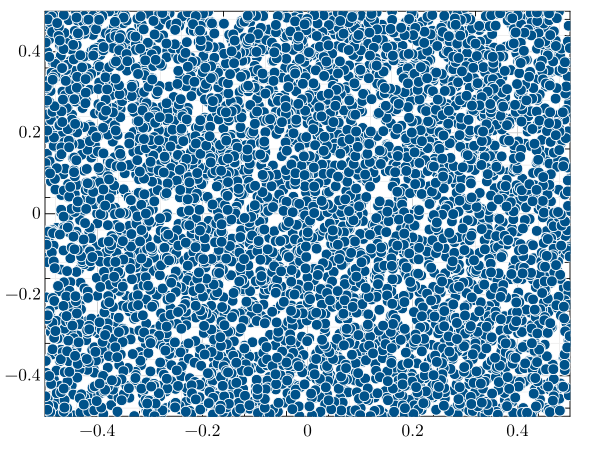

In [97]:
figure()
scatter(xs, ys)

In [98]:
for j=1:length(xs)
    r = sqrt(xs[j]^2 + ys[j]^2)
    xs[j] /= r
    ys[j] /= r
end

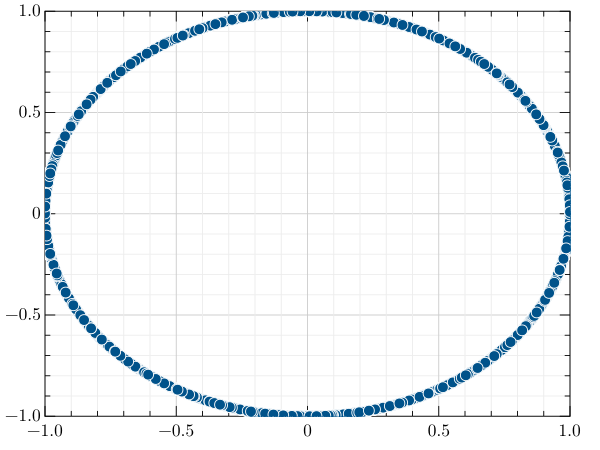

In [99]:
figure(width=400, height=400) # aspect ratio...?
scatter(xs, ys)

In [100]:
φs = [ atan(ys[j], xs[j]) for j=1:length(xs) ];

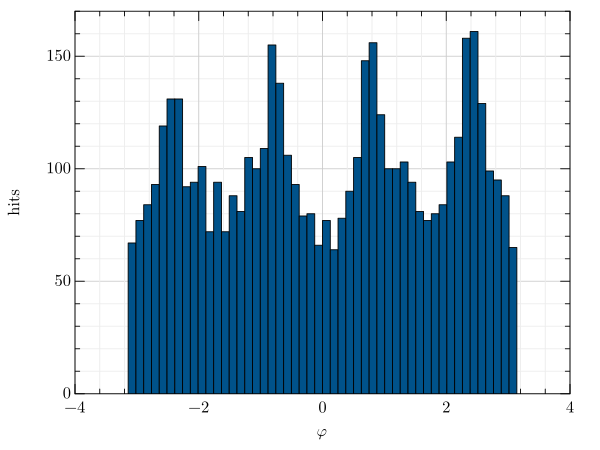

In [101]:
figure()
histogram(φs, nbins=50, xlabel="\$\\varphi\$", ylabel="hits")

In [102]:
savefig("test.pdf")

Takovýto generátor evidentně preferuje směry odpovídající osám kvadrantů.

Dvourozměrný ekvivalent histogramu (tj. pro dvousložková data) je metoda `hexbin`, která funguje analogicky, jen rovinu rozděluje na šestiúhelníky.

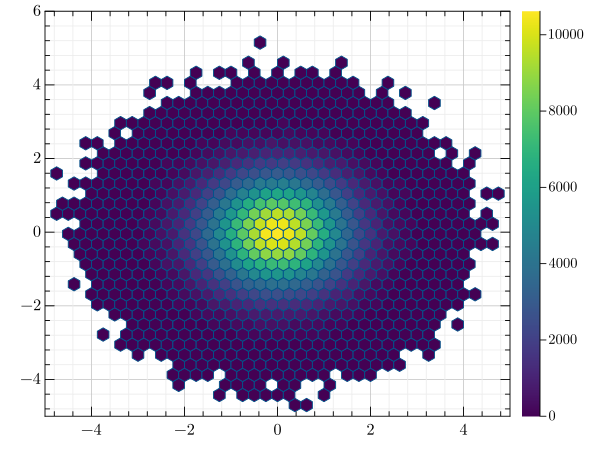

In [103]:
xs = randn(10^6)
ys = randn(10^6)

figure()
hexbin(xs, ys)

----
#### `contour` a `contourf`

_Contour plot_ je vizualizace funkce dvou proměnných, která v jejím definičním oboru znázorňuje _křivky, kde je daná funkce konstantní_ (tzv. kontury). Varianta s `f` v názvu vybarvuje plochy mezi konturami (_fill_).

Metody očekávají buď trojici vektorů `x`, `y`, `z`, kde `x` a `y` definují souřadnice mřížky a `z` obsahuje funkční hodnoty na této mřížce (tj. `z` je _matice_). Místo `z` můžeme předat funkci dvou proměnných.

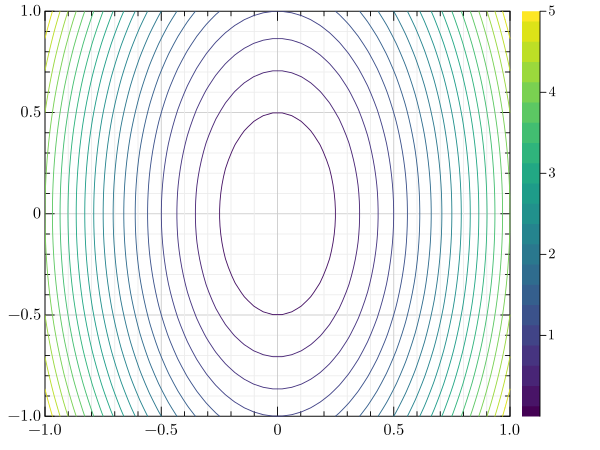

In [104]:
figure()
contour(LinRange(-1, 1, 50), LinRange(-1, 1, 50), (x, y) -> 4x^2 + y^2)

**Pozor, jak se GR chová k pořadí os!**

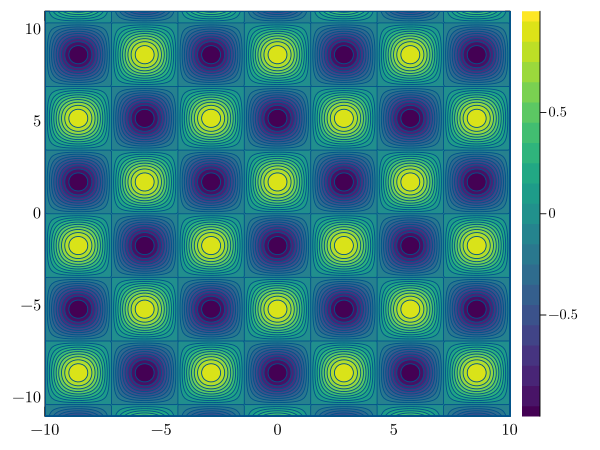

In [105]:
figure()

xs = LinRange(-10, 10, 200)
ys = LinRange(-11, 11, 200)
zs = [ sin(x)*cos(y) for x in xs, y in ys ]

contourf(xs, ys, zs)

----
#### `heatmap`

`heatmap` funguje v podstatě stejně jako `contour`, jen se nesnaží nalézt křivky konstantní hodnoty funkce (což je netriviální! Odpovídající algoritmus [_marching cubes algorithm_](https://en.wikipedia.org/wiki/Marching_cubes) (zde _squares_ -- 2D varianta) byl ještě do relativně nedávná doby pod patentem.)

In [106]:
figure()

xs = LinRange(-10, 10, 200)
ys = LinRange(-10, 10, 200)
zs = [ sin(x)*cos(y/3) for x in xs, y in ys ]

heatmap(xs, ys, zs, colormap=GR.COLORMAP_FLAME)

----
#### `imshow`

Tato metoda je velmi užitečná. Umožňuje nám graficky znázornit _matici_.

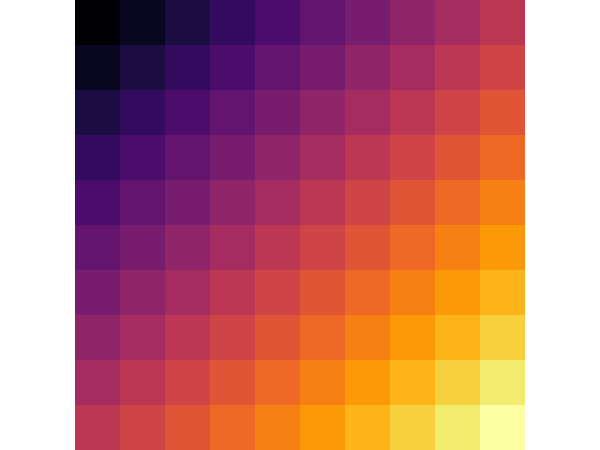

In [107]:
h = [ i + j - 1 for i=1:10, j=1:10 ]

figure()
imshow(h, colormap=GR.COLORMAP_INFERNO)

----
#### Cvičení: Julia v Julia

Uvažme zobrazení $f: \mathbb{C} \to \mathbb{C}$ zadané předpisem $f_c(z) = z^2 + c$, pro pevně zadanou konstantu $c \in \mathbb{C}$.
Zkoumáme pak množinu bodů $z\in\mathbb{C}$, pro které je posloupnost $(f^n(z))_{n=1}^\infty$ _omezená_ (mocnina označuje opakované skládání zobrazení).

Přibližně se lze k této množině blížit takto: zvolme _dostatečně velké_ $R > 0$ a maximální počet iterací $M \in \mathbb{N}$ a pro $z$ z nějaké zvolené množiny (typicky mřížka) naměřme, kolik iterací musíme provést, než se dostaneme dále než $R$ od počátku.

Proveďte tento výpočet pro $c = -0.8 + 0.156i$ a $c = (\varphi - 2) + (\varphi - 1)i$.

In [108]:
function julia(c::Complex{Float64}, R::Float64, reals, imags; imax::Int64=1000)
    data = fill(imax, length(reals), length(imags))
    f(u) = u^2 + c   
    
    for j = axes(reals, 1), k = axes(imags, 1)
        z = reals[j] + 1im * imags[k]
        
        for n = 1:imax
            z = f(z)
            if abs(z) > R
                data[j, k] = n
                break
            end
        end
    end
    
    return transpose(data)
end

julia (generic function with 1 method)

In [109]:
res = LinRange(-2, 2, 20)
ims = LinRange(-1, 1, 10)
data1 = julia(-0.8 + 0.156im, 4.0, res, ims)

10×20 transpose(::Matrix{Int64}) with eltype Int64:
 1  2  2   2   2    2    2    3   3  …   3    3    3    2   2   2  2  2  1
 1  2  2   2   2    3    3    3   4      4    4    3    3   3   2  2  2  2
 2  2  2   2   3    3    4    4   6     12    6    5    4   4   3  2  2  2
 2  2  3   3   4   12    7    6  32     42  187    9  179   7   4  3  2  2
 2  2  3   5   6   92  414   87  14     20   52   18   42  52  23  4  2  2
 2  2  4  23  52   42   18   52  20  …  14   87  414   92   6   5  3  2  2
 2  2  3   4   7  179    9  187  42     32    6    7   12   4   3  3  2  2
 2  2  2   3   4    4    5    6  12      6    4    4    3   3   2  2  2  2
 2  2  2   2   3    3    3    4   4      4    3    3    3   2   2  2  2  1
 1  2  2   2   2    2    3    3   3      3    3    2    2   2   2  2  2  1

In [110]:
heatmap(res, ims, data1, colormap=GR.COLORMAP_OCEAN, xlabel="\$\\Re\$", ylabel="\$\\Im\$")

In [111]:
res = LinRange(-2, 2, 600)
ims = LinRange(-1, 1, 400)
data2 = julia(-0.8 + 0.156im, 4.0, res, ims);

In [112]:
heatmap(res, ims, data2, colormap=GR.COLORMAP_GLOWING, xlabel="\$\\Re\$", ylabel="\$\\Im\$")

In [113]:
res = LinRange(-0.3, -0.1, 800)
ims = LinRange(-0.35, -0.15, 800)
data2 = julia(-0.8 + 0.156im, 4.0, res, ims);

In [114]:
heatmap(res, ims, data2, colormap=GR.COLORMAP_GLOWING, xlabel="\$\\Re\$", ylabel="\$\\Im\$")

In [115]:
using PyPlot

LoadError: ArgumentError: Package PyPlot not found in current path:
- Run `import Pkg; Pkg.add("PyPlot")` to install the PyPlot package.


In [116]:
res = LinRange(-2, 2, 600)
ims = LinRange(-1, 1, 400)
data2 = julia(-0.8 + 0.156im, 4.0, res, ims);

fig, ax = plt.subplots()
ax.imshow(data2, extent=[res[1], res[end], ims[1], ims[end]])

LoadError: UndefVarError: plt not defined

In [117]:
res = LinRange(-0.6, 0, 1000)
ims = LinRange(0, 0.6, 1000)
c = (MathConstants.golden - 2) + (MathConstants.golden - 1)*1im
data3 = julia(c, 5.0, res, ims);

In [118]:
fig, ax = plt.subplots()
ax.imshow(data3, extent=[res[1], res[end], ims[1], ims[end]], cmap="Reds")

LoadError: UndefVarError: plt not defined

---
<span id="pyplot"/>

### 1.2 [`PyPlot.jl`](https://github.com/JuliaPy/PyPlot.jl)

`PyPlot.jl` je v podstatě Julia rozhraní k [Matplotlib](matplotlib.org/) Pyhon knihovně, přesněji k funkcím v [matplotlib.pyplot](http://matplotlib.org/api/pyplot_api.html) Python modulu.

Pokud znáte tuto knihovnu, pak by pro vás tato varianta měla být asi nejpříjemnější na používání.
Pro ostatní mohou být užitečné [tyto taháky](https://github.com/matplotlib/cheatsheets#cheatsheets).

 * **Výhody**: lepší dokumentace, obrovská základna uživatelů, ozkoušený a robustní software.
 * **Nevýhody**: pomalejší, závislost na Pythonu.


Budete potřebovat mít nainstalovánu tuto knihovnu (`$ pip install matplotlib`) a poté nainstalovat Julia balíček `PyPlot.jl`:

```
(@v1.6) pkg> add PyPlot
```

Pro porovnání ukažme jen základní typ grafu a pak zkusme vytvořit komplikovanější diagram v cvičení.


In [119]:
# Doporučuji restartovat jádro!
using PyPlot

LoadError: ArgumentError: Package PyPlot not found in current path:
- Run `import Pkg; Pkg.add("PyPlot")` to install the PyPlot package.


----
#### `plot`

Logika této metody je velmi podobná jako analogické metody v `GR.jl` výše.

In [120]:
xs = LinRange(0, 10, 200)
ys = [ sin(x) - sin(2x)/2 + sin(3x)/3 - sin(4x)/4 for x in xs ]

f = figure()
plot(xs, ys, color="red", linewidth=4.0, linestyle="--")
grid()
title("Můj úžasný graf")
xlabel("\$x\$")
ylabel("\$y\$");

LoadError: invalid redefinition of constant f

Výsledné obrázky lze opět snadno uložit.

In [121]:
f.savefig("matplotlib_fig.png")

LoadError: type #f has no field savefig

K dispozici také je několik přednastavených stylů, například:

In [122]:
f = figure()
plt.style.use("seaborn")
plot(xs, ys, color="red", linewidth=4.0, linestyle="--")
title("Můj úžasný graf")
xlabel(L"$x$")
ylabel(L"$y$");

LoadError: invalid redefinition of constant f

----
#### Cvičení: Řešení ODE

V předchozí lekci jsme si ukázali, jak vyřešit obyčejnou diferenciální rovnici $y' = \mathbb{A} y$, $y(0) = y_0 \in \mathbb{C}^n$, pomocí maticové exponenciály.
Řešením byla vektorová funkce $y(t) = \exp(t\mathbb{A}) y_0$.

Konkrétně jsme zvolili

$$ \mathbb{A} = \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}. $$

Pokuste se vizualizovat tato řešení (v rovině) pro pár počátečních podmínek.

_Poznámka_: Viz předchozí notebook.

In [123]:
A = [0 -1; 1 0]

function solution(matrix, initial_condition, timestamps)
    # ...
end

solution (generic function with 1 method)

In [124]:
ts = LinRange(0, 3, 100)
s1 = solution(A, [1, 0], ts)
s2 = solution(A, [-0.5, 0], ts)
s3 = solution(A, [1, 1], ts);

In [125]:
f = figure()

scatter(s1[:,1], s1[:,2], color="red")
scatter(s2[:,1], s2[:,2], color="green")
scatter(s3[:,1], s3[:,2], color="blue")
grid()
title("Trajektorie")
xlabel("\$x\$")
ylabel("\$y\$");

LoadError: invalid redefinition of constant f

---
### 1.3 [`PGFPlotsX.jl`](https://github.com/KristofferC/PGFPlotsX.jl)

Tento balíček využívá pro generování grafů LaTeX balíček [PGFPlots](https://ctan.org/pkg/pgfplots).

 * **Výhody**: zřejmě nejkvalitnější výstup, vhodný i do publikací.
 * **Nevýhody**: ideálně vyžaduje familiaritu s PGFPlots, náročnější instalace.

Musíte mít _lokálně nainstalovaný LaTeX s balíčkem PGFPlots_.
Poté jen přidáme Julia balíček

```
(@v1.6) pkg> add PGFPlotsX
```

In [126]:
using PGFPlotsX

LoadError: ArgumentError: Package PGFPlotsX not found in current path:
- Run `import Pkg; Pkg.add("PGFPlotsX")` to install the PGFPlotsX package.


Takřka nutností pro používání tohoto balíčku je prostudování si [PGFPlots manuálu](http://mirrors.ctan.org/graphics/pgf/contrib/pgfplots/doc/pgfplots.pdf), který je velmi podrobný a názorný.


In [127]:
xs = LinRange(0, 20, 100)
ys = [ cos(x)/sqrt(x+1) for x in xs ];

Makro `@pgf` nám umožňuje parsovat výrazy, které by nebyly validní Julia kód, například parametry grafu:

In [128]:
options = @pgf {
    title => "Tlumená oscilace",
    xlabel => "\$x\$",
    ylabel => "\$y\$",
    grid => "major"
}

LoadError: LoadError: UndefVarError: @pgf not defined
in expression starting at In[128]:1

Grafické objekty pak vytvoříme pomocí konstruktorů, jejichž jména kopírují názvy LaTeX maker a prostředí.

In [129]:
g = Axis(options, Plot(Table(xs, ys)))

LoadError: UndefVarError: Table not defined

Můžeme si i prohlédnout LaTeX kód, který se vygeneroval:

In [130]:
print_tex(g)

LoadError: UndefVarError: print_tex not defined

PGFPlots nabízí bohaté možnosti změny stylu a prezentace:

In [131]:
@pgf Axis(options, Plot({"red", "line width" => "2pt" }, Table(xs, ys)))

LoadError: LoadError: UndefVarError: @pgf not defined
in expression starting at In[131]:1

PGFPlots zvládá i 3D grafy (v LaTeXu!!!).

In [132]:
@pgf Axis({"colorbar"},
    Plot3({"surf", "samples" => "15", "domain" => "0:1", "y domain" => "-1:1"}, Expression("x^2 - y^2"))
)

LoadError: LoadError: UndefVarError: @pgf not defined
in expression starting at In[132]:1

----
### 1.4 [`Makie.jl`](https://makie.juliaplots.org/stable/)

Do čtvrtice ještě jedna poměrně zajímavá možnost.
Pro podrobnější prozkoumání doporučuji vaší pozornosti [galerii](https://lazarusa.github.io/BeautifulMakie/).

 * **Výhody**: poměrně velmi dobrá dokumentace se spoustou příkladů.
 * **Nevýhody**: vleče se při prvním startu.

Balíček nabízí několik backendů: `CairoMakie.jl` (2D), `GLMakie.jl` a `WGLMakie.jl`.
Instalace je opět standardní a nebudu ji zde opakovat.

In [133]:
using CairoMakie

LoadError: ArgumentError: Package CairoMakie not found in current path:
- Run `import Pkg; Pkg.add("CairoMakie")` to install the CairoMakie package.


In [134]:
xs = LinRange(0, 20, 200)
ys = sin.(xs) .* xs;

In [135]:
fig, ax, plt = lines(xs, ys)
lines!(xs, cos.(xs))

ax.xlabel = "x"
ax.ylabel = "y"
ax.title = "Pokusný graf"

current_figure()

LoadError: UndefVarError: lines not defined

----
#### 3D grafy

`Makie` poskytuje dva backendy schopné vykreslovat 3D grafiku, `GLMakie.jl` a `WGLMakie.jl`. 

In [136]:
using GLMakie

xs = LinRange(0, 10, 100)
ys = LinRange(0, 15, 100)
zs = [cos(x) * sin(2*y) + x + y for x in xs, y in ys]

surface(xs, ys, zs, axis=(type=Axis3,))

LoadError: ArgumentError: Package GLMakie not found in current path:
- Run `import Pkg; Pkg.add("GLMakie")` to install the GLMakie package.


----
#### Cvičení: Vizualizace PRNG založeného na logistickém zobrazení

In [137]:
function my_prng(n, seed)
    data = zeros(n)
    data[1] = seed
    
    for j = 2:n
        data[j] = 4data[j-1]*(1 - data[j-1])
    end
    
    return data
end

my_prng (generic function with 1 method)

In [138]:
data = my_prng(10^6, 0.7500000001);

Jak tato posloupnost vypadá?

In [139]:
using CairoMakie

LoadError: ArgumentError: Package CairoMakie not found in current path:
- Run `import Pkg; Pkg.add("CairoMakie")` to install the CairoMakie package.


In [140]:
fig, ax, plt = scatter(1:1000, data[1:1000])

ax.xlabel = "n"

current_figure()

LoadError: MethodError: no method matching iterate(::GR.SVG)
[0mClosest candidates are:
[0m  iterate([91m::Union{LinRange, StepRangeLen}[39m) at /usr/share/julia/base/range.jl:826
[0m  iterate([91m::Union{LinRange, StepRangeLen}[39m, [91m::Integer[39m) at /usr/share/julia/base/range.jl:826
[0m  iterate([91m::T[39m) where T<:Union{Base.KeySet{<:Any, <:Dict}, Base.ValueIterator{<:Dict}} at /usr/share/julia/base/dict.jl:695
[0m  ...

In [141]:
hist(data, bins=50, normalization = :pdf)

LoadError: UndefVarError: hist not defined

In [142]:
f(x) = acos(1-2x)/pi
udata = f.(data);

In [143]:
hist(udata, bins=50, normalization = :pdf)

LoadError: UndefVarError: hist not defined

----
### 1.5 [`Interact.jl`](https://github.com/JuliaGizmos/Interact.jl)

Tento balíček umožňuje vytvářet interaktivní vizualizace.
Pokyny k instalaci jsou tentokrát malinko komplikovanější, viz [Getting Started](https://github.com/JuliaGizmos/Interact.jl#getting-started).

In [144]:
using Interact, CairoMakie

LoadError: ArgumentError: Package Interact not found in current path:
- Run `import Pkg; Pkg.add("Interact")` to install the Interact package.


In [145]:
xs = LinRange(-5, 20, 200);

In [146]:
@manipulate for a=0:0.01:1, ω=0:0.01:2
    ys  = [ a * sin(ω * x) for x in xs  ]
    vbox(lines(xs, ys))
end

LoadError: LoadError: UndefVarError: @manipulate not defined
in expression starting at In[146]:1

---
## 2. [`Images.jl`](https://github.com/JuliaImages/Images.jl), `Colors.jl`, `ImageMagick.jl`, `ImageMetadata.jl`...

Tyto balíčky se specializují přímo na práci s obrázky, jejich vytváření a jejich editaci.
Nespadají tedy přímo do kategorie předchozích balíčků.
Využijete je třeba při rychlém generování obrázků z matic nebo při strojovém před/zpracování obrázků (viz [`ImageFeatures.jl`](https://juliaimages.org/stable/pkgs/features/), [`ImageTransformation.jl`](https://juliaimages.org/stable/pkgs/transformations/) nebo [`ImageSegmentation.jl`](https://juliaimages.org/stable/pkgs/segmentation/).

Instalace je opět standardní (`]add Images`, `]add Colors`).

In [147]:
using Images, Colors

LoadError: ArgumentError: Package Images not found in current path:
- Run `import Pkg; Pkg.add("Images")` to install the Images package.


---
### 2.1 Vytvoření obrázku

In [148]:
img_data = rand(400, 600)

400×600 Matrix{Float64}:
 0.958849   0.00850231  0.1914      …  0.649107   0.708162    0.624347
 0.281976   0.365269    0.112987       0.804562   0.00195518  0.432884
 0.0707617  0.256717    0.157342       0.923432   0.576479    0.633204
 0.177295   0.426732    0.378645       0.404501   0.241809    0.707354
 0.75292    0.60986     0.903577       0.783007   0.422916    0.442618
 0.227533   0.995016    0.733902    …  0.327175   0.136109    0.532648
 0.658285   0.459652    0.619628       0.173545   0.103321    0.0934299
 0.488537   0.714117    0.276522       0.586617   0.114969    0.957529
 0.0692915  0.236663    0.0658377      0.561277   0.075869    0.54514
 0.651238   0.311479    0.805192       0.428296   0.874866    0.138982
 0.890628   0.485204    0.844048    …  0.509427   0.583415    0.660045
 0.513502   0.849508    0.72581        0.415219   0.26755     0.701629
 0.795916   0.668105    0.228269       0.453824   0.0152275   0.59528
 ⋮                                  ⋱                

In [149]:
img = Gray.(img_data)

LoadError: UndefVarError: Gray not defined

In [150]:
display(MIME("text/plain"), img)

LoadError: UndefVarError: img not defined

In [151]:
dump(img)

LoadError: UndefVarError: img not defined

Obrázky můžeme i snadno ukládat v různých formátech.

In [152]:
using FileIO

LoadError: ArgumentError: Package FileIO not found in current path:
- Run `import Pkg; Pkg.add("FileIO")` to install the FileIO package.


In [153]:
save("test.png", img)

LoadError: UndefVarError: save not defined

----
### Nahrávání obrázků

In [154]:
using FileIO, ImageMagick, ImageIO

LoadError: ArgumentError: Package FileIO not found in current path:
- Run `import Pkg; Pkg.add("FileIO")` to install the FileIO package.


In [155]:
img_Gauss = load("../homeworks/files/gauss_portret.jpg")

LoadError: UndefVarError: load not defined

In [156]:
dump(img_Gauss)

LoadError: UndefVarError: img_Gauss not defined

Všimněte si speciálního datového typu:

In [157]:
?N0f8

search:

Couldn't find N0f8
Perhaps you meant NaN, Inf, Int8, f, gcf, diff, eof, fd, Ref, if or NaN16


No documentation found.

Binding `N0f8` does not exist.


Jeden pixel je barevně reprezentován trojicí čísel (RGB).

In [158]:
p = img_Gauss[1,1]

LoadError: UndefVarError: img_Gauss not defined

In [159]:
typeof(p)

LoadError: UndefVarError: p not defined

In [160]:
p.r

LoadError: UndefVarError: p not defined

Například můžeme extrahovat červený kanál a převést ho do datového typu, v kterém se lépe počítá:

In [161]:
imgR = map(x -> Float64(x.r), img_Gauss)

LoadError: UndefVarError: img_Gauss not defined

In [162]:
Gray.(imgR)

LoadError: UndefVarError: Gray not defined

In [163]:
Gray.([imgR[1:180, :]; imgR[225:end, :]])

LoadError: UndefVarError: imgR not defined

----
## Řešení některých příkladů

K Julia:

In [164]:
function julia(c::Complex{Float64}, R::Float64, reals, imags; imax::Int64=1000)
    img   = zeros(length(reals), length(imags))
    fc(z) = z^2 + c
    
    for j in axes(reals, 1), k in axes(imags, 1)
        n = 0
        z = reals[j] + 1im*imags[k]
        
        while n <= imax && abs(z) < R
            z = fc(z)
            n += 1
        end
        
        img[j, k] = n
    end
    
    return img
end

julia (generic function with 1 method)